Задача: провести разведывательный анализ данных для проекта по отслеживанию влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска; отобрать данные для построения модели.



Порядок работы:
1. Подключить библиотеки для работы, прочитать данные.
2. Для каждого столбца найти количество пустых строк, найти и убрать выбросы (если они есть). 
3. Для количественных переменных построить гистограммы распределений и сделать выводы.
4. Провести корреляционный анализ и анализ номинативных переменных (построить боксплоты, выполнить тест Стьюдента), отобрать переменные для построения модели.
5. Сформулировать выводы.

In [1487]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import random

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.xls')

In [1488]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Имеем 13 числовых и 17 категориальных (номинативных) показателей.

In [1489]:
# Определим количество пропусков в столбцах
stud.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [1490]:
# Функция для подсчета уникальных значений по столбцам с выводом пустых значений
def unique_values(column):
    df = pd.DataFrame(stud[column].value_counts(dropna=False))

    return df

In [1491]:
# Функция для рассчета IQR и определения выборосов
def IQR_outlier(column):
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    IQR = perc75 - perc25

    return ('25-й перцентиль: {},'.format(perc25)[:-1], '75-й перцентиль: {},'.format(perc75),
            "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [1492]:
# Функция для заполнения пропусков в номинативных значениях модой
def fill_with_mode(stud, nom_columns):
    for column in nom_columns:
        stud[column] = stud[column].apply(lambda x: stud[column].mode()[0]
                                          if pd.isnull(x) == True else x)

In [1493]:
# Список номинативных признаков
nom_columns = ['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
               'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [1494]:
# Заменим пропуски во всех категориальных столбцах
fill_with_mode(stud, nom_columns)

In [1495]:
# Функция для заполнения пропусков в числовых значениях медианой
def fill_with_median(stud, num_columns):
    for column in num_columns:
        stud[column] = stud[column].apply(
            lambda x: stud[column].median() if pd.isnull(x) == True else x)

In [1496]:
# Список числовых колонок (кроме score)
num_columns = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
               'studytime, granular', 'famrel', 'freetime', 'goout', 'health', 'absences']

In [1497]:
# Заменим пропуски во всех числовых колонках
fill_with_median(stud, num_columns)

In [1498]:
# Для заголовков ниже: (num) - числовые значения, (no) - номинативные

# 0. 'school' column (no)

In [1499]:
unique_values('school')

,school
GP,349
MS,46


Пропуски в колонке отсутствуют, большинство студентов из школы GP. 

# 1. 'sex' column (no)

In [1500]:
unique_values('sex')

,sex
F,208
M,187


Количество студентов мужского и женского пола примерно одинаковое, вероятно не даст большой разницы при анализе.

# 2. 'age' column (num)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

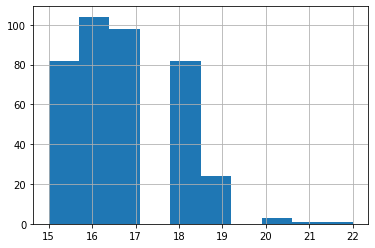

In [1501]:
stud.age.hist()
stud.age.describe()

In [1502]:
IQR_outlier('age')

('25-й перцентиль: 16.0',
 '75-й перцентиль: 18.0,',
 'IQR: 2.0, ',
 'Границы выбросов: [13.0, 21.0].')

Возраст 22 выглядит как выброс, но учитывая формулировку задачи, нам нужно рассмотреть учащихся 15-22 лет, так что исключать значение я бы не стала.

# 3. 'address' column (no)

In [1503]:
unique_values('address')

,address
U,312
R,83


In [1504]:
# Можно так же заменять значения в колонках случайным образом, пробовала этот способ для тренировки
# addr_list = ['U', 'R']
# stud.address = stud.address.apply(
#    lambda x: addr_list[random.randint(0, 1)] if pd.isnull(x) == True else x)

In [1505]:
unique_values('address')

,address
U,312
R,83


Большая часть учащихся - жители города, есть предположение, что у городских жителей успеваемость лучше хотя бы потому, что они меньше времени тратят на дорогу и у них больше  времени заниматься дополнительно.

# 4. 'famsize' column (no)

In [1506]:
unique_values('famsize')

,famsize
GT3,288
LE3,107


В большинстве семей 4 и более человек.

# 5. 'Pstatus' column (no)

In [1507]:
unique_values('Pstatus')

,Pstatus
T,359
A,36


90% семей полные. 

# 6. 'Medu' column (num)

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

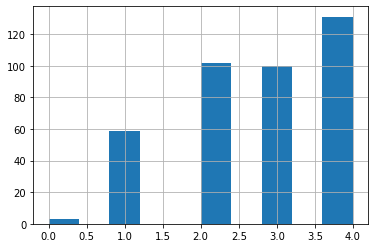

In [1508]:
stud.Medu.hist()
stud.Medu.describe()

Ноль - это не выбросы, это одно из возможных значений, так что данные в колонке чистые.

# 7. 'Fedu' column (num)

count    395.000000
mean       2.577215
std        2.164782
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

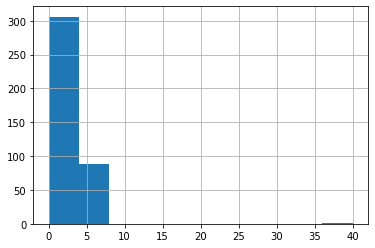

In [1509]:
stud.Fedu.hist()
stud.Fedu.describe()

In [1510]:
#  Примем 40 за опечатку и заменим на 4.0
stud.loc[stud['Fedu'] == 40, 'Fedu'] = 4.0

count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

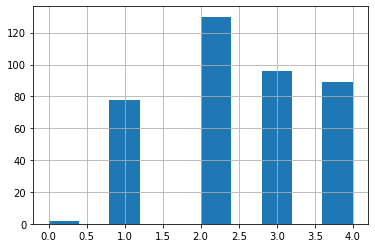

In [1511]:
stud.Fedu.hist()
stud.Fedu.describe()

Здесь с нулями то же самое.

# 8. 'Mjob'  column (no)

In [1512]:
unique_values('Mjob')

,Mjob
other,152
services,98
at_home,58
teacher,55
health,32


Около 40% данных о профессии матери имеют тип "другое". То есть можно будет делать выводы о влиянии принадлежности родителей к сфере здравоохранения, гос.службе, образованию и домашнему хозяйству.

# 9. 'Fjob' column (no)

In [1513]:
unique_values('Fjob')

,Fjob
other,233
services,102
teacher,29
at_home,16
health,15


Около 60% данных о профессии отца имеют тип "другое".

# 10. 'reason' column (no)

In [1514]:
unique_values('reason')

,reason
course,154
home,104
reputation,103
other,34


По критериям выбора школы лидирует образовательная программа. Качество образовательной программы может иметь влияние на успеваемость учащихся.

# 11. 'guardian' column (no)

In [1515]:
unique_values('guardian')

,guardian
mother,281
father,86
other,28


Большинство учащихся имеют главным опекуном мать, что скорее всего вытекает из того, что большинство семей полные.

# 12. 'traveltime' column (num)

count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

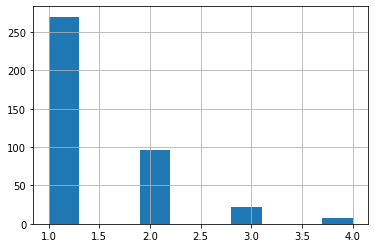

In [1516]:
stud.traveltime.hist()
stud.traveltime.describe()

In [1517]:
# IQR_outlier('traveltime')

Большинство учащихся тратят дорогу в школу менее 15 минут.

# 13. 'studytime' column (num)

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

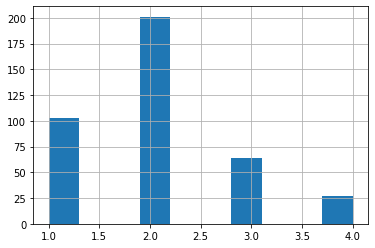

In [1518]:
stud.studytime.hist()
stud.studytime.describe()

Больша часть студентов тратит до 5 часов на дополнительные занятия математикой вне школы в неделю.

# 14. 'failures' column (num)

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

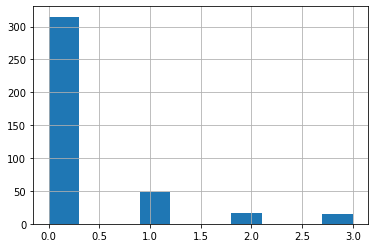

In [1519]:
stud.failures.hist()
stud.failures.describe()

В подавляющем большинстве случаев учащиеся не имели внеучебных неудач(проблем).

# 15. 'schoolsup' column (no)

In [1520]:
unique_values('schoolsup')

,schoolsup
no,344
yes,51


Большинство студентов не получают дополнительной образовательной поддержки.

# 16. 'famsup' column (no)

In [1521]:
unique_values('famsup')

,famsup
yes,258
no,137


Большинство студентов имеют семейную образовательную поддержку.

# 17. 'paid' column (no)

In [1522]:
unique_values('paid')

,paid
no,240
yes,155


Менее 40% учащихся посещают дополнительные платные занятия по математике. На мой взгляд показатель будет иметь влияние на оценку.

# 18. 'activities' column (no)

In [1523]:
unique_values('activities')

,activities
yes,209
no,186


Значения делятся примерно поровну между учащимися, занимающимися и не занимающимися дополнительной активностью.

# 19. 'nursery' column (no)

In [1524]:
unique_values('nursery')

,nursery
yes,316
no,79


Подавляющее большинство учащихся посещали детский сад.

# 20. 'studytime, granular' column (num)

count    395.000000
mean      -6.113924
std        2.503740
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

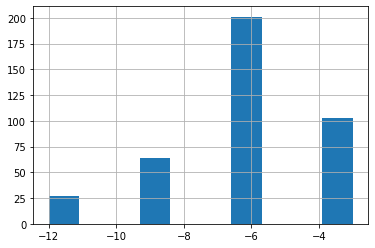

In [1525]:
stud['studytime, granular'].hist()
stud['studytime, granular'].describe()

In [1526]:
unique_values('studytime, granular')

,"studytime, granular"
-6.0,201
-3.0,103
-9.0,64
-12.0,27


При исследовании данного признака было выявлено, что это параметр studytime, умноженный на коэффициент -3.

In [1527]:
# Видим пропорциональную зависимость признаков
stud.groupby(['studytime'])['studytime, granular'].unique()

studytime
1.0     [-3.0]
2.0     [-6.0]
3.0     [-9.0]
4.0    [-12.0]
Name: studytime, granular, dtype: object

# 21. 'higher' column (no)

In [1528]:
unique_values('higher')

,higher
yes,376
no,19


Почти все учащиеся собираются в ВУЗ, но очевидно, что это будет влиять на балл по математике, так как математика важна для поступающих.

# 22. 'internet' column (no)

In [1529]:
unique_values('internet')

,internet
yes,339
no,56


Около 80% учащихся имеют доступ к Интернету. Это дает больше возможности поиска информации и доступ к онлайн-обучению, так что вероятно критерий имеет влияние на успеваемость.

# 23. 'romantic' column (no)

In [1530]:
unique_values('romantic')

,romantic
no,271
yes,124


Больше половины учащихся состоят в романтических отношениях. Это может влиять на успеваемость, так как отношения могут как улучшать, так и ухудшать эмоциональный фон, повышать или снижать мотивацию к учебе.

# 24. 'famrel' column (num)

count    395.000000
mean       3.941772
std        0.895081
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

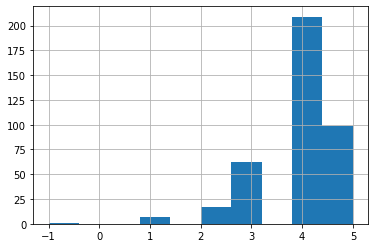

In [1531]:
stud.famrel.hist()
stud.famrel.describe()

In [1532]:
IQR_outlier('famrel')

('25-й перцентиль: 4.0',
 '75-й перцентиль: 4.5,',
 'IQR: 0.5, ',
 'Границы выбросов: [3.25, 5.25].')

In [1533]:
unique_values('famrel')

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [1534]:
#  Примем значение -1 за опечатку и заменим на 1
stud.loc[stud['famrel'] == -1, 'famrel'] = 1

count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

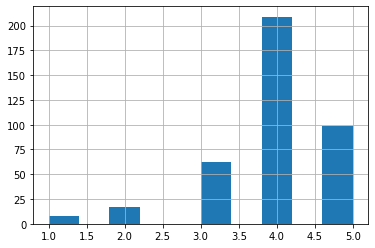

In [1535]:
stud.famrel.hist()
stud.famrel.describe()

Семейные отношения учащихся в основном имеют оценку от 3 до 5. Наиболее частое значение - 4.

# 25. 'freetime' column (num)

count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

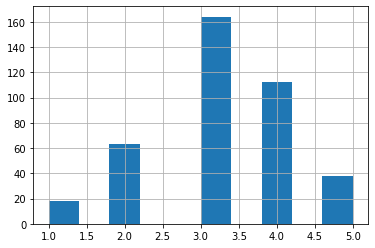

In [1536]:
stud.freetime.hist()
stud.freetime.describe()

Большинство уащихся имеют достаточно свободного времени.

# 26. 'goout' column (num)

count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

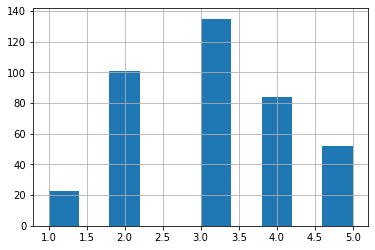

In [1537]:
stud.goout.hist()
stud.goout.describe()

Нельзя сказать, что учащиеся проводят много времени с друзьями, но скорее всего зависимость с показателем freetime здесь прямо пропорциональная: чем больше свободного времени, тем больше времени ученики проводят с друзьями.

Text(0.5, 1.0, 'Время с друзьями')

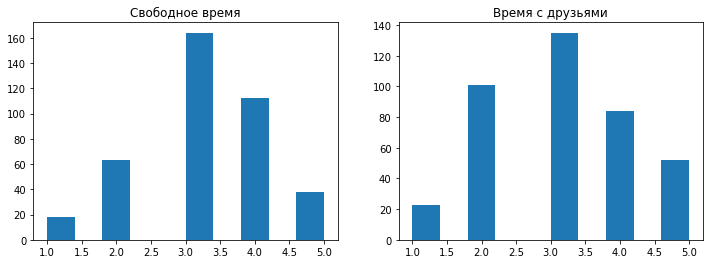

In [1538]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(stud['freetime'])
axes[0].set_title('Свободное время')

axes[1].hist(stud['goout'])
axes[1].set_title('Время с друзьями')

# 27. 'health' column (num)

count    395.000000
mean       3.549367
std        1.372118
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

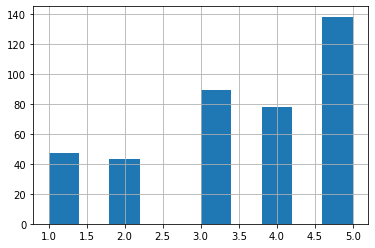

In [1539]:
stud.health.hist()
stud.health.describe()

Несмотря на то, что самая частая оценка - 5, не все учащиеся имеют хорошее состояние здоровья. Это может быть причиной как сниженной успеваемости, так и пропусков занятий, а еще нулевых оценок в графе score.

# 28. 'absences' column (num)

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

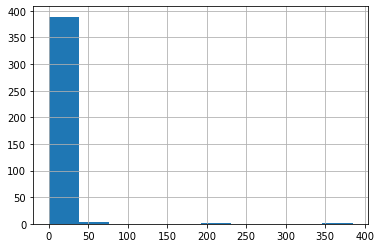

In [1540]:
stud.absences.hist()
stud.absences.describe()

In [1541]:
IQR_outlier('absences')

('25-й перцентиль: 0.0',
 '75-й перцентиль: 8.0,',
 'IQR: 8.0, ',
 'Границы выбросов: [-12.0, 20.0].')

In [1542]:
unique_values('absences')

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Принято решение проверить, сколько именно аномально больших значений встречается в данных. Я удалила значения 212 и 385, они слишком большие и встречаются по одному разу. Будем считать их выбросами.

In [1543]:
stud = stud.loc[~stud['absences'].isin([212, 385])]

# 29. 'score' column (num)

count    387.000000
mean      52.196382
std       22.914748
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

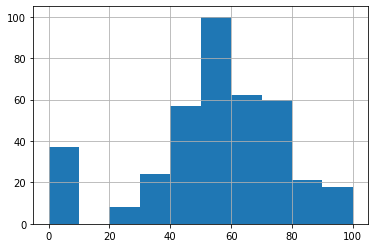

In [1544]:
stud.score.hist()
stud.score.describe()

In [1545]:
unique_values('score')

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,26
80.0,16


In [1546]:
# Удалим строки с незаполненными значениями, нет смысла их рассматривать при отсуствии значения целевой переменной
stud = stud[~stud['score'].isnull()] 

37 человек имеют оценку 0 баллов, нет точного понимания, откуда взялась эта оценка (неявка, незнание, пропуск по болезни), исключать не будем, но возможно придется вернуться к этим данным при дальнейшем анализе.

# Correlation analysis for numeric columns

In [1547]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.144104,-0.141431,0.080071,-0.017954,0.192816,0.017954,0.046539,0.001401,0.114612,-0.069156,0.169789,-0.153488
Medu,-0.144104,1.000000,0.590471,-0.155119,0.079460,-0.238225,-0.079460,-0.005457,0.040834,0.069751,-0.054646,0.095674,0.212650
Fedu,-0.141431,0.590471,1.000000,-0.107416,0.011731,-0.259510,-0.011731,-0.011425,-0.020312,0.050007,0.001449,0.031444,0.123111
traveltime,0.080071,-0.155119,-0.107416,1.000000,-0.098450,0.038437,0.098450,-0.031054,-0.014313,0.045023,-0.036004,-0.000089,-0.055020
studytime,-0.017954,0.079460,0.011731,-0.098450,1.000000,-0.170471,-1.000000,0.038154,-0.122410,-0.053970,-0.072823,-0.064100,0.114737
failures,0.192816,-0.238225,-0.259510,0.038437,-0.170471,1.000000,0.170471,-0.038989,0.077106,0.095156,0.080346,0.061911,-0.337138
"studytime, granular",0.017954,-0.079460,-0.011731,0.098450,-1.000000,0.170471,1.000000,-0.038154,0.122410,0.053970,0.072823,0.064100,-0.114737
famrel,0.046539,-0.005457,-0.011425,-0.031054,0.038154,-0.038989,-0.038154,1.000000,0.159923,0.056925,0.086293,-0.042322,0.062745
freetime,0.001401,0.040834,-0.020312,-0.014313,-0.122410,0.077106,0.122410,0.159923,1.000000,0.292406,0.062246,-0.069754,0.019910
goout,0.114612,0.069751,0.050007,0.045023,-0.053970,0.095156,0.053970,0.056925,0.292406,1.000000,-0.019172,0.035231,-0.121098


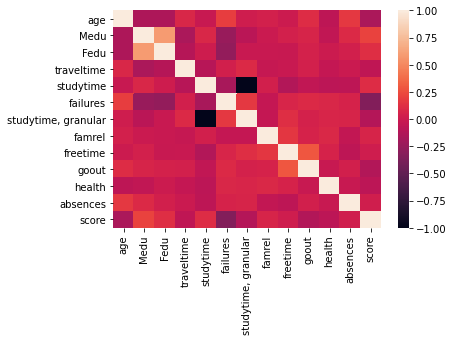

In [1548]:
sns.heatmap(stud.corr())

studytime и studytime, granular имеют корреляцию 1, так то исключим studytime, granular учитывая выводы выше при анализе колонки.
Medu и Fedu имеют корреляцию порядка  0.6, исключать из рассмотрения ни один параметр мы не будем. В остальном дублирующих признаков не выявлено.

# Box plots for nominative values

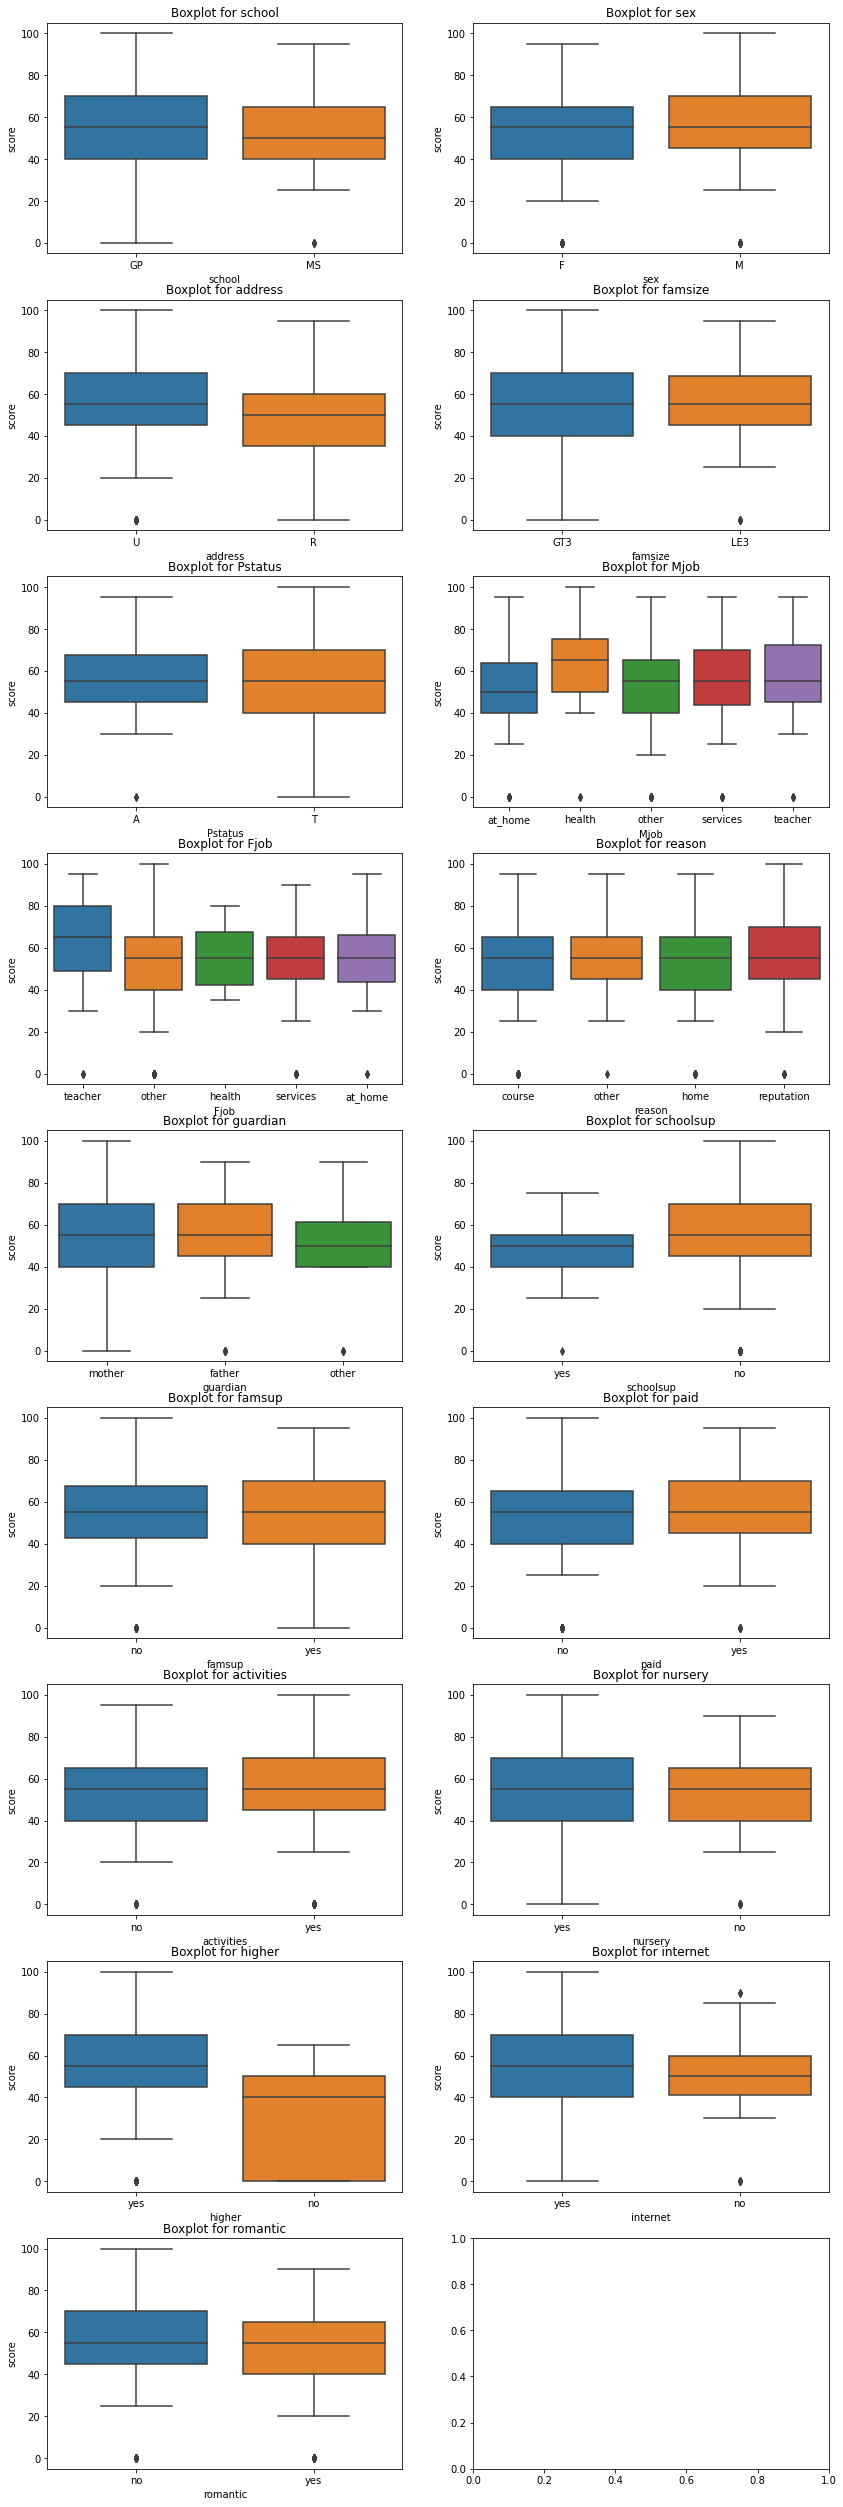

In [1549]:
# Функцию по выводу боксплотов в две колонки помог написать коллега с курса
def get_all_boxplots(ncol, columns_list, column_y):
    if len(columns_list) % ncol == 0:
        nrow = len(columns_list)//ncol
    else:
        nrow = len(columns_list)//ncol+1
    if 15//ncol >= 5:
        size_x = ncol*7
    else:
        size_x = 20
    size_y = nrow*5
    fig, axes = plt.subplots(nrow, ncol, figsize=(size_x, size_y))
    for i in range(nrow):  # проходим по строкам области рисования
        for j in range(ncol):  # проходим по столбцам области рисования
            if len(columns_list) == 0:  # если характеристики в списке закончились - прекращаем циклы
                break
            else:
                column_x = columns_list.pop(0) # удаляет первый элемент из списка и возвращает его значение
                if nrow == 1:
                    sns.boxplot(x=column_x, y=column_y, data=stud, ax=axes[j])
                    axes[j].set_title('Boxplot for ' + column_x)
                elif ncol == 1:
                    sns.boxplot(x=column_x, y=column_y, data=stud, ax=axes[i])
                    axes[i].set_title('Boxplot for ' + column_x)
                else:
                    sns.boxplot(x=column_x, y=column_y, data=stud, ax=axes[i, j])
                    axes[i, j].set_title('Boxplot for ' + column_x)
# список характеристик
columns_list = list(stud.select_dtypes(exclude='number').columns)
get_all_boxplots(2, columns_list, 'score')

По боксплотам визуально оценим взаимосвязь среднего значения признака и score. Связь видна для колонок: 
1. school
2. address
3. Mjob
4. Fjob
5. guardian
6. schoolsup
7. higher
8. internet

# Student's test for nominative columns

In [1550]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1551]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# DataFrame for the model

Учитывая результаты, полученные по ходу работы, отберем колонки для построения модели. Кроме числовых столбцов с низкой корреляцией, включим в итоговый датафрейм колонки, найденные с помощью теста Стьюдента, а так же те, которые имеют значимость по боксплотам. Пусть они не были выявлены тестом, но логически, по моему мнению, эти показатели так же могут иметь влияние на успеваемость учащихся в целом и на оценки по математике в частности (и выбор школы, и с каким опекуном проживает ребенок - т.е. семейная история, и учебная поддержка, и доступ в интернет).

In [1565]:
stud_for_model = stud.loc[:, ['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 
                              'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'paid',
                              'higher', 'internet', 'romantic', 'famrel', 'freetime',  'goout', 'health', 
                              'absences', 'score']]
stud_for_model.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,schoolsup,paid,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,mother,2.0,2.0,0.0,yes,no,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,father,1.0,2.0,0.0,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,mother,1.0,2.0,3.0,yes,no,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,4.0,2.0,health,other,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,father,1.0,2.0,0.0,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Выводы:
1. Количество пропущенных значений в колонках не превышает 12%.
2. Большинство данных достаточно чистые, выбросы или отсутствуют, или встречаются в незначительном количестве случаев.
3. Параметр studytime, granular имеет полную корреляцию с параметром studytime и должен быть исключен.
4. Связь Medu и Fedu вероятно обусловлена тем, что родители познакомились в учебных заведениях.
5. Для построения модели предлагается использовать столбцы:
    - (отобранные тестом Стьюдента)
    - sex
    - address
    - Mjob
    - paid
    - higher
    - romantic
    - (отобранные по боксплотам)
    - school
    - Fjob
    - guardian
    - schoolsup
    - internet
    - (числовые столбцы со слабой корреляцией)
    - age
    - Medu                 
    - Fedu                 
    - traveltime
    - studytime
    - failures
    - famrel
    - freetime
    - goout
    - health
    - absences
    - score

Комментарии для ментора.
- Не совсем ясно, как глубоко на данном этапе надо погружаться в изучение взаимосвязи показателей.
- Нет понимания, на каком основании принимается решения о правильности замены (например, почему мода или медиана более предпочтительный вариант, чем случайное заполнение).
- Было очень интересно работать, но довольно утомительно.
- Сложно применять статистические методы (корреляция, тест Стьюдента) без знания статистики.
- Есть ощущение, что в работе сделано недостаточно, но что именно можно улучшить, не знаю, так как опыта нет, а тренировочный пример не дает достаточной информации.